In [24]:
def my_axis_options(ax):
    ax.loglog()
    ax.set_xlabel("Physical Error Rate")
    ax.set_ylabel("Logical Error Rate per round")
    ax.legend()
    ax.grid()
    ax.grid(True, which = 'minor')
    # fig.set_dpi(120)  # Show it bigger
    # ax.set_ylim(1.3e-12, 3.5e-1)
    ax.set_ylim(1.3992277047193278e-13, 3.9115107136890295)
    ax.set_xlim(1e-4, 1e-2)
    ax.legend(*zip(*sorted(zip(*ax.get_legend_handles_labels()), key=lambda x: tuple(map(int, re.findall(r'\d+', x[1]))))))  # sort legend labels by number of qubits
    # ax.figure.savefig(f"../plots/tham_modules_noise.png", dpi = 300, bbox_inches = "tight")
    ax.figure.savefig(f"../plots/scrap.png", dpi = 300, bbox_inches = "tight")

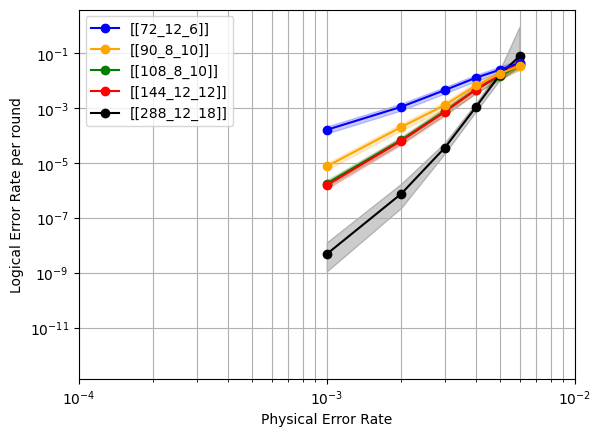

In [29]:
import matplotlib.pyplot as plt
import sinter 
import re


# collected_stats = sinter.stats_from_csv_files(f'../collected_stats/collected_stats_tham_modules.csv') #_min_sum_0.625_serial_osd_cs_9.csv')
collected_stats = sinter.stats_from_csv_files(f'../collected_stats/tham_modules_noise_long_chain_BPOSD_settings.csv', f'../collected_stats/288_12_18_tham_modules_noise_long_chain_BPOSD_settings.csv')
# collected_stats = sinter.stats_from_csv_files("../collected_stats/incl_opp_basis_detectors/collected_stats_tham_modules_incl_opp_detectors.csv", "../collected_stats/incl_opp_basis_detectors/mars_collected_stats_tham_modules_incl_opp_detectors.csv")

## HELIOS:
# collected_stats = sinter.stats_from_csv_files(f'../collected_stats/helios_noise_long_chain_BPOSD_settings (copy).csv')



fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=collected_stats,
    x_func=lambda stats: stats.json_metadata['p'],
    group_func=lambda stats: stats.json_metadata['nkd'],
    failure_units_per_shot_func = lambda stats: stats.json_metadata['r'], # set as num_rounds ('r') failure units to find pL per round
    filter_func=lambda s: 
        s.json_metadata['p'] > 0.5e-3,
        #and s.json_metadata['b'] == 'Z' ,
    plot_args_func = lambda index, curve_id: {
        'color': 'green' if '108' in curve_id else 'red' if '144' in curve_id else 'orange' if '90' in curve_id else 'blue' if '72' in curve_id else 'black',
        'marker': 'o'
}

)

my_axis_options(ax)


In [9]:
import sinter

for stat in collected_stats:
    print(stat)
    # if stat.json_metadata['p'] == 0.0005:
    #     nkd = stat.json_metadata['nkd'].strip("[]").split("_")
    #     k = int(nkd[1])
    #     print(k)


      9775,       105,         0,    86.9,bposd,69e8811f063d432cb4cd6926fbb9def8fbfae61513401e1fa4d044ce192c7164,"{""A"":""'300102'"",""B"":""'031020'"",""b"":""X"",""excl_opp_b_detectors"":""True"",""l"":6,""m"":6,""nkd"":""[[72_12_6]]"",""noise"":""helios"",""p"":0.006,""r"":6,""seq_gates"":""True""}",
     51012,       105,         0,   148.0,bposd,6400c34e7e195153e63edb42aee5defa8561c6cc000a121e46a41877e928d75c,"{""A"":""'300102'"",""B"":""'031020'"",""b"":""X"",""excl_opp_b_detectors"":""True"",""l"":6,""m"":6,""nkd"":""[[72_12_6]]"",""noise"":""helios"",""p"":0.004,""r"":6,""seq_gates"":""True""}",
  11554694,        10,         0,  7015.3,bposd,a9c43a149e73745664517e37fb5efab2494340a397592b8bfc9fd6411d927baf,"{""A"":""'900102'"",""B"":""'002070'"",""b"":""X"",""excl_opp_b_detectors"":""True"",""l"":15,""m"":3,""nkd"":""[[90_8_10]]"",""noise"":""helios"",""p"":0.001,""r"":10,""seq_gates"":""True""}",
    100000,        13,         0,   869.1,bposd,d182858ba9e3d4cc9bbd8b5ea3be7731